# KÖR DENNA FÖRST FÖR ATT IMPORTERA ALLA BIBLIOTEK

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import openml
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


# KONTROLLERA KONTAKT MED OPENML

In [5]:
import openml
from sklearn.datasets import fetch_openml

def check_openml_connection():
    try:
        # Försök hämta MNIST-datasetet från OpenML
        print("Försöker hämta MNIST-datasetet från OpenML...")
        mnist = fetch_openml('mnist_784', version=1, as_frame=False)
        
        # Om det lyckas, skriv ut en bekräftelse
        print("Kontakt med OpenML lyckades!")
        print("Datasetet har följande egenskaper:")
        print(f"- Antal datapunkter: {mnist.data.shape[0]}")
        print(f"- Antal features: {mnist.data.shape[1]}")
        print(f"- Klasser: {set(mnist.target)}")
        
    except Exception as e:
        # Om något går fel, skriv ut felmeddelandet
        print("Det uppstod ett problem med OpenML-anslutningen:")
        print(e)

# Kör funktionen för att kontrollera anslutningen
check_openml_connection()

Försöker hämta MNIST-datasetet från OpenML...
Kontakt med OpenML lyckades!
Datasetet har följande egenskaper:
- Antal datapunkter: 70000
- Antal features: 784
- Klasser: {'4', '3', '8', '9', '0', '6', '5', '2', '7', '1'}


# LADDA MODELL OCH GÖR EDA

In [7]:
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd


# Ladda modell
mnist = fetch_openml('mnist_784', version = 1, cache = True, as_frame = False)

X = mnist ["data"]
y = mnist["target"].astype(np.uint8)

# Skapa en DataFrame från MNIST-data
data = pd.DataFrame(X)  # X är mnist["data"]
data['target'] = y  # y är mnist["target"]

# Snabb överblick av datan
print("\033[1m=== Överblick av data ===\033[0m")
print(data.head())  # För att se de första 5 raderna
print(data.info())  # För att se datatyper och null-värden
print(data.describe())  # Grundläggande statistik
print("\n")

# Saknade värden
print("\033[1m=== Saknade värden ===\033[0m")
print(data.isnull().sum())
print("\n")

# Andel saknade värden
print("\033[1m=== Procent saknade värden ===\033[0m")
missing_percentage = data.isnull().sum() / len(data) * 100
print(missing_percentage)
print("\n")

=== Överblick av data ===
   0  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  782  \
0  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
1  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
2  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
3  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
4  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   

   783  target  
0    0       5  
1    0       0  
2    0       4  
3    0       1  
4    0       9  

[5 rows x 785 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, 0 to target
dtypes: int64(784), uint8(1)
memory usage: 418.8 MB
None
             0        1        2        3        4        5        6        7  \
count  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0   
mean       0.0      0.0      0.0      

# BOXPLOTS FÖR ATT HITTA OUTLIERS

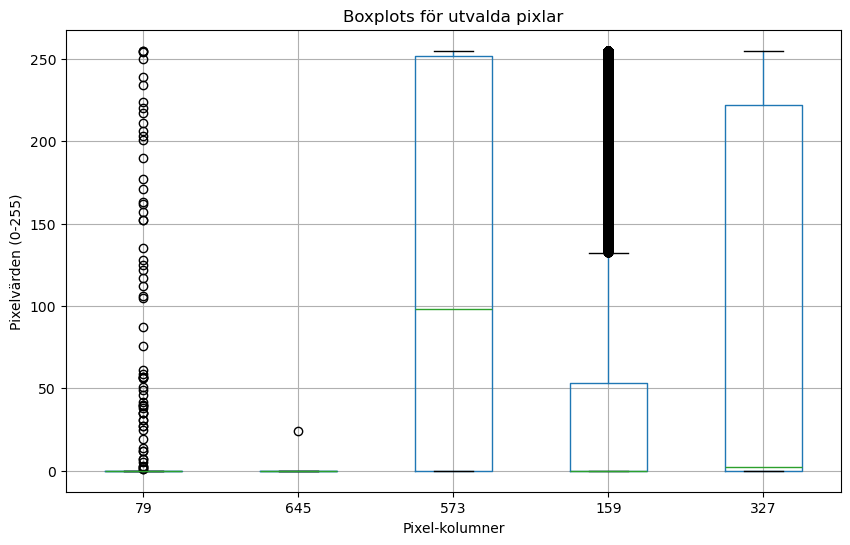

In [9]:
import openml
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Ladda in MNIST-data
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(np.uint8)

# Skapa en DataFrame från data
data = pd.DataFrame(X)  # X är pixelvärden
data['target'] = y      # Lägg till målvariabeln

# Välj några slumpmässiga kolumner (pixlar) för att plotta boxplots
sample_columns = np.random.choice(data.columns[:-1], size=5, replace=False)  # Välj 5 slumpmässiga kolumner

# Skapa boxplots
plt.figure(figsize=(10, 6))
data[sample_columns].boxplot()
plt.title("Boxplots för utvalda pixlar")
plt.xlabel("Pixel-kolumner")
plt.ylabel("Pixelvärden (0-255)")
plt.show()

# VISUALISERA DATA

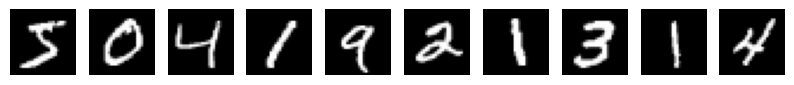

In [11]:
# Visualisera några siffror från datasetet
fig, axes = plt.subplots(1, 10, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X[i].reshape(28, 28), cmap="gray")
    ax.axis("off")
plt.show()

# Ladda in och förbered data

In [13]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Ladda in och förbered data
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(np.uint8)

# Dela upp i tränings- och testdata
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skala data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistisk regression

=== Logistisk regression ===
Noggrannhet: 0.9155
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.95      0.97      0.96      1600
           2       0.90      0.89      0.90      1380
           3       0.90      0.89      0.90      1433
           4       0.92      0.92      0.92      1295
           5       0.88      0.88      0.88      1273
           6       0.93      0.94      0.94      1396
           7       0.92      0.94      0.93      1503
           8       0.90      0.86      0.88      1357
           9       0.89      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.92      0.92      0.92     14000



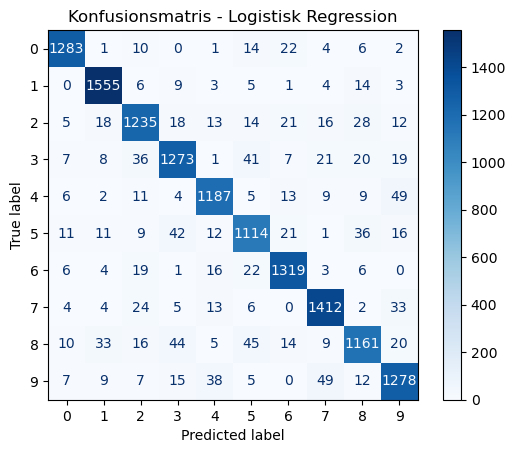

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Logistisk regression
print("\033[1m=== Logistisk regression ===\033[0m")
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs')
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)
print("Noggrannhet:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# Konfusionsmatris för Logistisk Regression
cm_log = confusion_matrix(y_test, y_pred_log)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=log_reg.classes_)
disp_log.plot(cmap='Blues')
plt.title("Konfusionsmatris - Logistisk Regression")
plt.show()

# SUPPORT VECTOR MACHINE (SVM)

In [17]:
from sklearn.svm import SVC

# SVM
print("\033[1m=== SVM ===\033[0m")
svm_model = SVC(kernel='rbf', gamma='scale')
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
print("Noggrannhet:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

=== SVM ===
Noggrannhet: 0.963
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1343
           1       0.98      0.99      0.98      1600
           2       0.95      0.96      0.95      1380
           3       0.96      0.95      0.96      1433
           4       0.96      0.96      0.96      1295
           5       0.97      0.96      0.96      1273
           6       0.97      0.98      0.97      1396
           7       0.92      0.97      0.95      1503
           8       0.97      0.95      0.96      1357
           9       0.96      0.93      0.95      1420

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



# RANDOM FOREST

=== Random Forest ===
Noggrannhet: 0.9674285714285714
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1343
           1       0.98      0.98      0.98      1600
           2       0.95      0.97      0.96      1380
           3       0.96      0.95      0.96      1433
           4       0.96      0.97      0.97      1295
           5       0.97      0.96      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.95      0.96      1357
           9       0.96      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



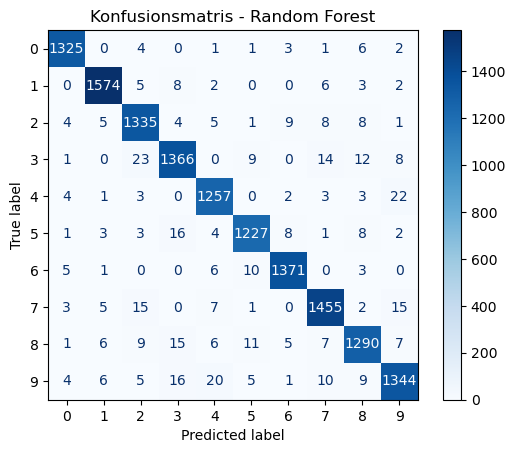

Random Forest - Korsvalideringsnoggrannhet: 0.9670 ± 0.0013


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Random Forest
print("\033[1m=== Random Forest ===\033[0m")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("Noggrannhet:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Konfusionsmatris för Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
disp_rf.plot(cmap='Blues')
plt.title("Konfusionsmatris - Random Forest")
plt.show()

# Korsvalidering för Random Forest
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Random Forest - Korsvalideringsnoggrannhet: {cv_scores_rf.mean():.4f} ± {cv_scores_rf.std():.4f}")

# GRID SEARCH

In [21]:
# Importera nödvändiga bibliotek
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# === Grid Search ===
print("\033[1m=== Grid Search ===\033[0m")
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Skapa en RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Skapa GridSearchCV-objektet
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Träna modellen med Grid Search
grid_search.fit(X_train, y_train)

# Visa de bästa parametrarna
print("Bästa parametrar:", grid_search.best_params_)

# Använd den bästa modellen från Grid Search för att göra förutsägelser på testdata
y_pred_grid = grid_search.best_estimator_.predict(X_test)

# Beräkna noggrannheten på testdata
accuracy_grid = accuracy_score(y_test, y_pred_grid)
print("Noggrannhet för Random Forest (Grid Search) på testdata:", accuracy_grid)

=== Grid Search ===
Bästa parametrar: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Noggrannhet för Random Forest (Grid Search) på testdata: 0.9682142857142857


# JÄMFÖRLSE MODELLER

In [23]:
# === Modelljämförelse ===
print("\033[1m=== Modelljämförelse ===\033[0m")

# Lägg till Grid Search-resultatet
results = {
    "Logistisk regression": accuracy_score(y_test, y_pred_log),
    "SVM": accuracy_score(y_test, y_pred_svm),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "Random Forest (Grid Search)": accuracy_grid,  # Noggrannhet på testdata
}

# Skriv ut resultaten
for model, accuracy in results.items():
    print(f"{model}: {accuracy:.4f}")

=== Modelljämförelse ===
Logistisk regression: 0.9155
SVM: 0.9630
Random Forest: 0.9674
Random Forest (Grid Search): 0.9682
